# Dataset 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

# Function to evaluate model and return metrics
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate metrics
    metrics = {
        'mse_train': mean_squared_error(y_train, y_pred_train),
        'rmse_train': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'r2_train': r2_score(y_train, y_pred_train),
        'mse_test': mean_squared_error(y_test, y_pred_test),
        'rmse_test': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'r2_test': r2_score(y_test, y_pred_test),
        "model_weights": model.coef_
    }

    return metrics

# Function to print metrics in a formatted way
def print_metrics(metrics, technique_name):
    print(f"\n--- {technique_name} ---")
    print(f"Training MSE: {metrics['mse_train']:.2f}")
    print(f"Training RMSE: {metrics['rmse_train']:.2f}")
    print(f"Training R²: {metrics['r2_train']:.4f}")
    print(f"Testing MSE: {metrics['mse_test']:.2f}")
    print(f"Testing RMSE: {metrics['rmse_test']:.2f}")
    print(f"Testing R²: {metrics['r2_test']:.4f}")
    print(f"Model Weights: {metrics['model_weights']}")

# Load the California housing dataset
print("Loading the California housing dataset...")
data = pd.read_csv('/content/drive/My Drive/California_Houses.csv')
print(f"Dataset Shape: {data.shape}")

# Split features and target
y = data['Median_House_Value']
X = data.drop('Median_House_Value', axis=1)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

# Save all model metrics for comparison
all_metrics = {}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading the California housing dataset...
Dataset Shape: (20640, 14)
Training set: (16512, 13), Test set: (4128, 13)


**Baseline Model**
- Users the original features without any moditifation
- Serves as regerence point for measuring improvements


In [ ]:
# =====================================
# Baseline Model (No Feature Engineering)
# =====================================
print("\n===== 0. Baseline Model (No Feature Engineering) =====")

# Create and evaluate baseline model
baseline_model = LinearRegression()
baseline_metrics = evaluate_model(baseline_model, X_train, X_test, y_train, y_test)
print_metrics(baseline_metrics, "Baseline Model")
all_metrics["Baseline"] = baseline_metrics



===== 0. Baseline Model (No Feature Engineering) =====

--- Baseline Model ---
Training MSE: 4680954167.59
Training RMSE: 68417.50
Training R²: 0.6498
Testing MSE: 4809839606.90
Testing RMSE: 69353.01
Testing R²: 0.6330
Model Weights: [ 3.93162911e+04  8.96347655e+02 -5.55925520e+00  1.04982868e+02
 -3.94906243e+01  4.41798247e+01 -4.39172585e+04 -2.69070105e+04
 -2.39421487e-01 -1.49486542e-01  2.39105028e-01  1.69669508e-01
 -1.47704169e-01]


Data Manipulation 1: Drop columns Latitude and Longitude, Population


**1. Feature Scaling**
- Standardizes all features to have mean = 0 and standard deviation = 1
- Makes the model treat all features equally regardless of their original scale
- Important for features that range from small to large

In [ ]:

print("\n===== 1. Feature Scaling =====")

# Apply scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and evaluate model with scaled features
scaling_model = LinearRegression()
scaling_metrics = evaluate_model(scaling_model, X_train_scaled, X_test_scaled, y_train, y_test)
print_metrics(scaling_metrics, "Feature Scaling")
all_metrics["Feature Scaling"] = scaling_metrics



===== 1. Feature Scaling =====

--- Feature Scaling ---
Training MSE: 4680954167.59
Training RMSE: 68417.50
Training R²: 0.6498
Testing MSE: 4809839606.90
Testing RMSE: 69353.01
Testing R²: 0.6330
Model Weights: [ 74867.50709037  11295.87867309 -12089.05012719  43987.23478853
 -44901.70658422  16830.58820349 -93833.64066733 -53964.50678243
 -11714.01118277 -37078.61606018  69247.57142743  36859.26932106
 -36947.73128804]


**2. Features Ratios**
- Standardizes all features to have mean=0 and standard deviation = 1
- makes the model treat all features equally regardless of their origianl scale.
- Important for features that range from small to large

In [ ]:
print("\n===== 2. Feature Ratios =====")

# Create dataframes for manipulation
X_train_ratio = X_train.copy()
X_test_ratio = X_test.copy()

# Create ratio features
# Avoid division by zero
X_train_ratio['Rooms_per_Household'] = X_train['Tot_Rooms'] / X_train['Households'].replace(0, 1)
X_test_ratio['Rooms_per_Household'] = X_test['Tot_Rooms'] / X_test['Households'].replace(0, 1)

X_train_ratio['Bedrooms_per_Room'] = X_train['Tot_Bedrooms'] / X_train['Tot_Rooms'].replace(0, 1)
X_test_ratio['Bedrooms_per_Room'] = X_test['Tot_Bedrooms'] / X_test['Tot_Rooms'].replace(0, 1)

X_train_ratio['Population_per_Household'] = X_train['Population'] / X_train['Households'].replace(0, 1)
X_test_ratio['Population_per_Household'] = X_test['Population'] / X_test['Households'].replace(0, 1)

# Handle any potential infinities
X_train_ratio.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test_ratio.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute any missing values
imputer = SimpleImputer(strategy='median')
X_train_ratio = imputer.fit_transform(X_train_ratio)
X_test_ratio = imputer.transform(X_test_ratio)

# Create and evaluate model with ratio features
ratio_model = LinearRegression()
ratio_metrics = evaluate_model(ratio_model, X_train_ratio, X_test_ratio, y_train, y_test)
print_metrics(ratio_metrics, "Feature Ratios")
all_metrics["Feature Ratios"] = ratio_metrics



===== 2. Feature Ratios =====

--- Feature Ratios ---
Training MSE: 4560438231.38
Training RMSE: 67531.02
Training R²: 0.6588
Testing MSE: 4768269792.55
Testing RMSE: 69052.66
Testing R²: 0.6361
Model Weights: [ 4.11096544e+04  9.27182339e+02  2.83124568e+00  1.07106651e+01
 -4.19213645e+01  1.07850633e+02 -4.36631340e+04 -2.79522835e+04
 -2.12091560e-01 -1.36257935e-01  2.21937225e-01  1.61690884e-01
 -1.39646176e-01  3.62968933e+03  2.88474086e+05  7.28875036e+01]


**Location based features**
- Rooms per household: indicates hoursing spaciousness.
- bedrooms per room: represents layout efficiency.
- population per household: measures occupancy density.

In [ ]:
print("\n===== 3. Location-based Features =====")

# Create dataframes for manipulation
X_train_loc = X_train.copy()
X_test_loc = X_test.copy()

# Create location-based features
X_train_loc['Proximity_Score'] = (
    1 / (1 + X_train['Distance_to_coast']) +
    1 / (1 + X_train['Distance_to_LA']) +
    1 / (1 + X_train['Distance_to_SanFrancisco']) +
    1 / (1 + X_train['Distance_to_SanJose']) +
    1 / (1 + X_train['Distance_to_SanDiego'])
)
X_test_loc['Proximity_Score'] = (
    1 / (1 + X_test['Distance_to_coast']) +
    1 / (1 + X_test['Distance_to_LA']) +
    1 / (1 + X_test['Distance_to_SanFrancisco']) +
    1 / (1 + X_test['Distance_to_SanJose']) +
    1 / (1 + X_test['Distance_to_SanDiego'])
)

X_train_loc['Coastal_Proximity'] = 1 / (1 + X_train['Distance_to_coast'])
X_test_loc['Coastal_Proximity'] = 1 / (1 + X_test['Distance_to_coast'])

# Create and evaluate model with location features
location_model = LinearRegression()
location_metrics = evaluate_model(location_model, X_train_loc, X_test_loc, y_train, y_test)
print_metrics(location_metrics, "Location-based Features")
all_metrics["Location-based Features"] = location_metrics


===== 3. Location-based Features =====

--- Location-based Features ---
Training MSE: 4474899208.12
Training RMSE: 66894.69
Training R²: 0.6652
Testing MSE: 4692059965.52
Testing RMSE: 68498.61
Testing R²: 0.6419
Model Weights: [ 3.88482171e+04  6.19893722e+02 -2.05828248e+00  8.15544626e+01
 -3.88612478e+01  4.71288082e+01 -3.66356269e+04 -2.14583942e+04
 -2.38373865e-01 -1.78434436e-01  2.70705549e-01  5.95715611e-02
 -2.20574711e-02  1.03110227e+08 -4.56557367e+07]


**Binning Median Age**

- Categories housing age into 5 distinct groups
- Applies one-hot encoding to create binary features from each category.
- Captures the non-linear relationship bertweeen buiuldings and age and values
- Allows different coeffieints for different age brackets.

In [ ]:

print("\n===== 4. Binning Median Age =====")

# Create dataframes for manipulation
X_train_age = X_train.copy()
X_test_age = X_test.copy()

# Create age categories
def age_category(age):
    if age < 10:
        return 0  # New development
    elif age < 20:
        return 1  # Relatively new
    elif age < 30:
        return 2  # Medium age
    elif age < 40:
        return 3  # Older
    else:
        return 4  # Oldest housing

X_train_age['Age_Category'] = X_train['Median_Age'].apply(age_category)
X_test_age['Age_Category'] = X_test['Median_Age'].apply(age_category)

# One-hot encode age categories
age_dummies_train = pd.get_dummies(X_train_age['Age_Category'], prefix='Age_Cat')
age_dummies_test = pd.get_dummies(X_test_age['Age_Category'], prefix='Age_Cat')
X_train_age = pd.concat([X_train_age, age_dummies_train], axis=1)
X_test_age = pd.concat([X_test_age, age_dummies_test], axis=1)

# Drop the original categorical column
X_train_age = X_train_age.drop('Age_Category', axis=1)
X_test_age = X_test_age.drop('Age_Category', axis=1)

# Create and evaluate model with age binning
age_model = LinearRegression()
age_metrics = evaluate_model(age_model, X_train_age, X_test_age, y_train, y_test)
print_metrics(age_metrics, "Age Binning")
all_metrics["Age Binning"] = age_metrics



===== 4. Binning Median Age =====

--- Age Binning ---
Training MSE: 4663394918.68
Training RMSE: 68289.05
Training R²: 0.6511
Testing MSE: 4801222542.96
Testing RMSE: 69290.85
Testing R²: 0.6336
Model Weights: [ 3.92252698e+04  1.65010361e+03 -5.38625641e+00  1.03733083e+02
 -3.91101752e+01  4.30013605e+01 -4.28128199e+04 -2.68309232e+04
 -2.46954195e-01 -1.52688584e-01  2.34671160e-01  1.58898138e-01
 -1.36469935e-01  1.38391420e+04  8.44944548e+03  4.33818572e+03
 -1.23936507e+04 -1.42331225e+04]


**Polynomial Features for Income**
 - Adds squared and cubed terms for median income
 - Enables the linear modelto fit curved relationship with income
 - Captures exponential effects of neighborhood income on housing prices.

In [ ]:

print("\n===== 5. Polynomial Features for Income =====")

# Create dataframes for manipulation
X_train_poly = X_train.copy()
X_test_poly = X_test.copy()

# Create polynomial features for income
X_train_poly['Income_Squared'] = X_train['Median_Income'] ** 2
X_train_poly['Income_Cubed'] = X_train['Median_Income'] ** 3
X_test_poly['Income_Squared'] = X_test['Median_Income'] ** 2
X_test_poly['Income_Cubed'] = X_test['Median_Income'] ** 3

# Create and evaluate model with polynomial features
poly_model = LinearRegression()
poly_metrics = evaluate_model(poly_model, X_train_poly, X_test_poly, y_train, y_test)
print_metrics(poly_metrics, "Polynomial Features")
all_metrics["Polynomial Features"] = poly_metrics



===== 5. Polynomial Features for Income =====

--- Polynomial Features ---
Training MSE: 4453844618.77
Training RMSE: 66737.13
Training R²: 0.6668
Testing MSE: 4664873321.17
Testing RMSE: 68299.88
Testing R²: 0.6440
Model Weights: [-2.95951054e+03  9.94004992e+02 -9.84022854e+00  1.26576000e+02
 -3.86213778e+01  4.24805898e+01 -4.17888063e+04 -2.64389164e+04
 -2.28048228e-01 -1.45576635e-01  2.25700173e-01  1.72614210e-01
 -1.48764011e-01  8.83562885e+03 -4.76916513e+02]


**Geographuc Clustering**
 - Segments California into 6 distinct regional markets.
 - Applies one-hot encoding to these regions.
 - Allows the model to learn specific market conditions for each area.
 - More information than raw latitude/longitude coordinates.

In [ ]:

print("\n===== 6. Geographic Clustering =====")

# Create dataframes for manipulation
X_train_geo = X_train.copy()
X_test_geo = X_test.copy()

# Define California regions based on latitude/longitude
def california_region(lat, long):
    # Northern California
    if lat > 37.5:
        if long < -122:
            return 'NorCal_Coast'  # Northern California Coast
        else:
            return 'NorCal_Inland'  # Northern California Inland
    # Central California
    elif lat > 35:
        if long < -120:
            return 'Central_Coast'  # Central Coast
        else:
            return 'Central_Valley'  # Central Valley
    # Southern California
    else:
        if long < -118:
            return 'SoCal_Coast'  # Southern California Coast
        else:
            return 'SoCal_Inland'  # Southern California Inland

# Create region feature
X_train_geo['Region'] = X_train.apply(lambda x: california_region(x['Latitude'], x['Longitude']), axis=1)
X_test_geo['Region'] = X_test.apply(lambda x: california_region(x['Latitude'], x['Longitude']), axis=1)

# One-hot encode regions
region_dummies_train = pd.get_dummies(X_train_geo['Region'], prefix='Region')
region_dummies_test = pd.get_dummies(X_test_geo['Region'], prefix='Region')
X_train_geo = pd.concat([X_train_geo, region_dummies_train], axis=1)
X_test_geo = pd.concat([X_test_geo, region_dummies_test], axis=1)

# Drop the original categorical column
X_train_geo = X_train_geo.drop('Region', axis=1)
X_test_geo = X_test_geo.drop('Region', axis=1)

# Create and evaluate model with geographic clustering
geo_model = LinearRegression()
geo_metrics = evaluate_model(geo_model, X_train_geo, X_test_geo, y_train, y_test)
print_metrics(geo_metrics, "Geographic Clustering")
all_metrics["Geographic Clustering"] = geo_metrics


===== 6. Geographic Clustering =====

--- Geographic Clustering ---
Training MSE: 4536190444.78
Training RMSE: 67351.25
Training R²: 0.6607
Testing MSE: 4662883069.00
Testing RMSE: 68285.31
Testing R²: 0.6442
Model Weights: [ 3.85069190e+04  7.82882758e+02 -3.86911285e+00  8.83311359e+01
 -3.97170905e+01  5.22877952e+01 -3.64522179e+04 -2.63474650e+04
 -5.03828040e-02 -8.05576902e-02  5.21293548e-02  7.35644637e-01
 -7.74132268e-01  3.61111837e+04 -2.41992477e+04 -3.26931376e+04
 -1.61274563e+04  3.05776815e+04  6.33097633e+03]


In [ ]:

print("\n===== 7. All Features Combined =====")

# Start with scaling
scaler = StandardScaler()
X_train_all = scaler.fit_transform(X_train)
X_test_all = scaler.transform(X_test)

# Convert to dataframe for easier manipulation
X_train_all_df = pd.DataFrame(X_train_all, columns=X_train.columns)
X_test_all_df = pd.DataFrame(X_test_all, columns=X_test.columns)

# 2. Add ratio features
X_train_all_df['Rooms_per_Household'] = X_train['Tot_Rooms'] / X_train['Households'].replace(0, 1)
X_test_all_df['Rooms_per_Household'] = X_test['Tot_Rooms'] / X_test['Households'].replace(0, 1)
X_train_all_df['Bedrooms_per_Room'] = X_train['Tot_Bedrooms'] / X_train['Tot_Rooms'].replace(0, 1)
X_test_all_df['Bedrooms_per_Room'] = X_test['Tot_Bedrooms'] / X_test['Tot_Rooms'].replace(0, 1)
X_train_all_df['Population_per_Household'] = X_train['Population'] / X_train['Households'].replace(0, 1)
X_test_all_df['Population_per_Household'] = X_test['Population'] / X_test['Households'].replace(0, 1)

# 3. Add location-based features
X_train_all_df['Proximity_Score'] = (
    1 / (1 + X_train['Distance_to_coast']) +
    1 / (1 + X_train['Distance_to_LA']) +
    1 / (1 + X_train['Distance_to_SanFrancisco']) +
    1 / (1 + X_train['Distance_to_SanJose']) +
    1 / (1 + X_train['Distance_to_SanDiego'])
)
X_test_all_df['Proximity_Score'] = (
    1 / (1 + X_test['Distance_to_coast']) +
    1 / (1 + X_test['Distance_to_LA']) +
    1 / (1 + X_test['Distance_to_SanFrancisco']) +
    1 / (1 + X_test['Distance_to_SanJose']) +
    1 / (1 + X_test['Distance_to_SanDiego'])
)
X_train_all_df['Coastal_Proximity'] = 1 / (1 + X_train['Distance_to_coast'])
X_test_all_df['Coastal_Proximity'] = 1 / (1 + X_test['Distance_to_coast'])

# 4. Add age categories
X_train_all_df['Age_Category'] = X_train['Median_Age'].apply(age_category)
X_test_all_df['Age_Category'] = X_test['Median_Age'].apply(age_category)
age_dummies_train = pd.get_dummies(X_train_all_df['Age_Category'], prefix='Age_Cat')
age_dummies_test = pd.get_dummies(X_test_all_df['Age_Category'], prefix='Age_Cat')
X_train_all_df = pd.concat([X_train_all_df, age_dummies_train], axis=1)
X_test_all_df = pd.concat([X_test_all_df, age_dummies_test], axis=1)

# 5. Add polynomial features
X_train_all_df['Income_Squared'] = X_train['Median_Income'] ** 2
X_train_all_df['Income_Cubed'] = X_train['Median_Income'] ** 3
X_test_all_df['Income_Squared'] = X_test['Median_Income'] ** 2
X_test_all_df['Income_Cubed'] = X_test['Median_Income'] ** 3

# 6. Add geographic clustering
X_train_all_df['Region'] = X_train.apply(lambda x: california_region(x['Latitude'], x['Longitude']), axis=1)
X_test_all_df['Region'] = X_test.apply(lambda x: california_region(x['Latitude'], x['Longitude']), axis=1)
region_dummies_train = pd.get_dummies(X_train_all_df['Region'], prefix='Region')
region_dummies_test = pd.get_dummies(X_test_all_df['Region'], prefix='Region')
X_train_all_df = pd.concat([X_train_all_df, region_dummies_train], axis=1)
X_test_all_df = pd.concat([X_test_all_df, region_dummies_test], axis=1)

# Remove categorical columns and handle missing values
X_train_all_df = X_train_all_df.select_dtypes(include=[np.number]).drop(['Age_Category'], axis=1, errors='ignore')
X_test_all_df = X_test_all_df.select_dtypes(include=[np.number]).drop(['Age_Category'], axis=1, errors='ignore')

# Replace infinities with NaN
X_train_all_df.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test_all_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_train_all_final = imputer.fit_transform(X_train_all_df)
X_test_all_final = imputer.transform(X_test_all_df)

# Create and evaluate model with all features
all_model = LinearRegression()
combined_metrics = evaluate_model(all_model, X_train_all_final, X_test_all_final, y_train, y_test)
print_metrics(combined_metrics, "All Features Combined")
all_metrics["All Features Combined"] = combined_metrics


===== 7. All Features Combined =====

--- All Features Combined ---
Training MSE: 4676276461.99
Training RMSE: 68383.31
Training R²: 0.6502
Testing MSE: 4810897773.48
Testing RMSE: 69360.64
Testing R²: 0.6329
Model Weights: [ 7.48918078e+04  1.13051344e+04 -1.21423104e+04  4.41125627e+04
 -4.48670367e+04  1.67181706e+04 -9.40365251e+04 -5.40467474e+04
 -1.16743940e+04 -3.71121142e+04  6.94840422e+04  3.69154231e+04
 -3.69235805e+04 -1.58597268e+02 -1.05534859e+04  9.18906390e+01
  8.39621118e+06 -5.04420933e+06 -4.51802367e+01  1.09578230e+01]



===== Comparison of All Models =====
                 Technique      Test MSE     Test RMSE   Test R²  \
6    Geographic Clustering  4.662883e+09  68285.306392  0.644166   
5      Polynomial Features  4.664873e+09  68299.877900  0.644014   
3  Location-based Features  4.692060e+09  68498.612873  0.641939   
2           Feature Ratios  4.768270e+09  69052.659562  0.636124   
4              Age Binning  4.801223e+09  69290.854685  0.633609   
0                 Baseline  4.809840e+09  69353.007194  0.632951   
1          Feature Scaling  4.809840e+09  69353.007194  0.632951   
7    All Features Combined  4.810898e+09  69360.635619  0.632871   

   Improvement in R²  Improvement in RMSE  
6       1.121456e-02         1.067701e+03  
5       1.106267e-02         1.053129e+03  
3       8.988006e-03         8.543943e+02  
2       3.172278e-03         3.003476e+02  
4       6.575858e-04         6.215251e+01  
0       0.000000e+00         0.000000e+00  
1      -2.309264e-14        -2.197339e-09

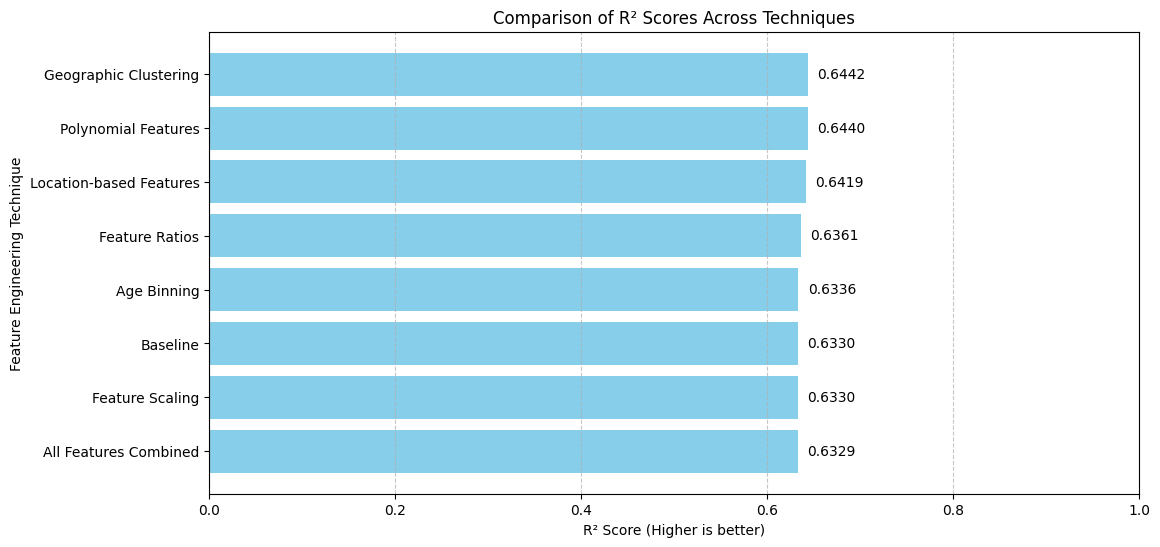

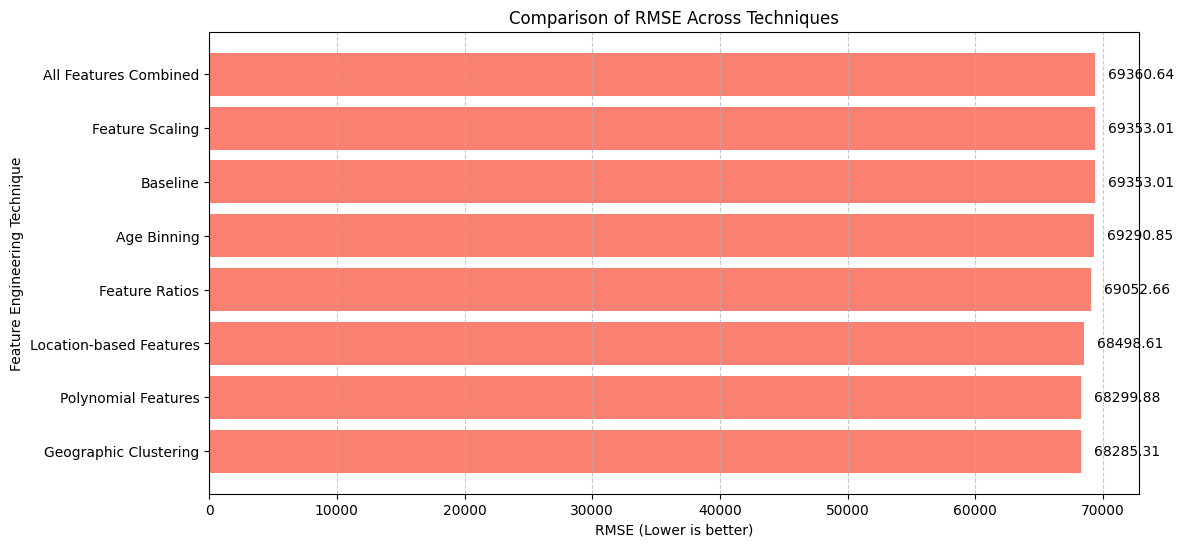

In [ ]:

print("\n===== Comparison of All Models =====")

# Extract test metrics for comparison
comparison = pd.DataFrame({
    'Technique': list(all_metrics.keys()),
    'Test MSE': [m['mse_test'] for m in all_metrics.values()],
    'Test RMSE': [m['rmse_test'] for m in all_metrics.values()],
    'Test R²': [m['r2_test'] for m in all_metrics.values()],
    'Improvement in R²': [m['r2_test'] - baseline_metrics['r2_test'] for m in all_metrics.values()],
    'Improvement in RMSE': [baseline_metrics['rmse_test'] - m['rmse_test'] for m in all_metrics.values()]
})

# Sort by R² score
comparison = comparison.sort_values('Test R²', ascending=False)
print(comparison)


# Plot R² scores
plt.figure(figsize=(12, 6))
comparison_sorted = comparison.sort_values('Test R²')
plt.barh(comparison_sorted['Technique'], comparison_sorted['Test R²'], color='skyblue')
plt.xlabel('R² Score (Higher is better)')
plt.ylabel('Feature Engineering Technique')
plt.title('Comparison of R² Scores Across Techniques')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, v in enumerate(comparison_sorted['Test R²']):
    plt.text(v + 0.01, i, f"{v:.4f}", va='center')

# Plot RMSE values
plt.figure(figsize=(12, 6))
comparison_sorted = comparison.sort_values('Test RMSE')
plt.barh(comparison_sorted['Technique'], comparison_sorted['Test RMSE'], color='salmon')
plt.xlabel('RMSE (Lower is better)')
plt.ylabel('Feature Engineering Technique')
plt.title('Comparison of RMSE Across Techniques')
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, v in enumerate(comparison_sorted['Test RMSE']):
    plt.text(v + 1000, i, f"{v:.2f}", va='center')

print("\nAnalysis complete! Check the comparison table above to see how each technique affects the model performance.")

# Dataset 2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

# Function to evaluate model and return metrics
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate metrics
    metrics = {
        'mse_train': mean_squared_error(y_train, y_pred_train),
        'rmse_train': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'r2_train': r2_score(y_train, y_pred_train),
        'mse_test': mean_squared_error(y_test, y_pred_test),
        'rmse_test': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'r2_test': r2_score(y_test, y_pred_test),
        "model_weights": model.coef_
    }

    return metrics

# Function to print metrics in a formatted way
def print_metrics(metrics, technique_name):
    print(f"\n--- {technique_name} ---")
    print(f"Training MSE: {metrics['mse_train']:.2f}")
    print(f"Training RMSE: {metrics['rmse_train']:.2f}")
    print(f"Training R²: {metrics['r2_train']:.4f}")
    print(f"Testing MSE: {metrics['mse_test']:.2f}")
    print(f"Testing RMSE: {metrics['rmse_test']:.2f}")
    print(f"Testing R²: {metrics['r2_test']:.4f}")
    print(f"Model Weights: {metrics['model_weights']}")

# Load the California housing dataset
print("Loading the California housing dataset (alternative version)...")
data = pd.read_csv('/content/drive/My Drive/1553768847-housing.csv')
print(f"Dataset Shape: {data.shape}")

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Handle missing values in total_bedrooms
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)

# Split features and target
y = data['median_house_value']
X = data.drop('median_house_value', axis=1)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

# Save all model metrics for comparison
all_metrics = {}

def preprocess_data(X_train, X_test, categorical_cols=None, handle_missing=True):
    """Preprocesses data with optional categorical encoding"""

    if categorical_cols is None:
        categorical_cols = []

    numeric_cols = [col for col in X_train.columns if col not in categorical_cols]

    # Create preprocessing pipelines
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_cols)
        ]
    )

    if categorical_cols:
        categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ])
        preprocessor.transformers.append(('cat', categorical_transformer, categorical_cols))

    # Preprocess the data
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)

    return X_train_processed, X_test_processed, preprocessor

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading the California housing dataset (alternative version)...
Dataset Shape: (20640, 10)

Missing Values:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64
Training set: (16512, 9), Test set: (4128, 9)


In [ ]:
# =====================================
# Baseline Model (With Categorical Encoding)
# =====================================
print("\n===== 0. Baseline Model =====")
X_train_baseline, X_test_baseline, _ = preprocess_data(X_train, X_test, categorical_cols=['ocean_proximity'])

# Create and evaluate baseline model
baseline_model = LinearRegression()
baseline_metrics = evaluate_model(baseline_model, X_train_baseline, X_test_baseline, y_train, y_test)
print_metrics(baseline_metrics, "Baseline Model")
all_metrics["Baseline"] = baseline_metrics




===== 0. Baseline Model =====

--- Baseline Model ---
Training MSE: 4683203783.50
Training RMSE: 68433.94
Training R²: 0.6497
Testing MSE: 4908476721.16
Testing RMSE: 70060.52
Testing R²: 0.6254
Model Weights: [-53826.64801649 -54415.6961445   13889.86618856 -13094.25116219
  43068.18184187 -43403.43242732  18382.19632373  75167.77476625
 -18926.58286195 -58713.23902328 117198.48975347 -24063.22507943
 -15495.4427888 ]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("\n===== 1. Feature Scaling =====")
# Since we already included scaling in the baseline, we'll use the same results
scaling_metrics = baseline_metrics.copy()
print_metrics(scaling_metrics, "Feature Scaling")
all_metrics["Feature Scaling"] = scaling_metrics


===== 1. Feature Scaling =====

--- Feature Scaling ---
Training MSE: 4683203783.50
Training RMSE: 68433.94
Training R²: 0.6497
Testing MSE: 4908476721.16
Testing RMSE: 70060.52
Testing R²: 0.6254
Model Weights: [-53826.64801649 -54415.6961445   13889.86618856 -13094.25116219
  43068.18184187 -43403.43242732  18382.19632373  75167.77476625
 -18926.58286195 -58713.23902328 117198.48975347 -24063.22507943
 -15495.4427888 ]


In [ ]:
print("\n===== 2. Feature Ratios =====")

# Create dataframes for manipulation
X_train_ratio = X_train.copy()
X_test_ratio = X_test.copy()

# Create ratio features
# Avoid division by zero
X_train_ratio['rooms_per_household'] = X_train['total_rooms'] / X_train['households'].replace(0, 1)
X_test_ratio['rooms_per_household'] = X_test['total_rooms'] / X_test['households'].replace(0, 1)

X_train_ratio['bedrooms_per_room'] = X_train['total_bedrooms'] / X_train['total_rooms'].replace(0, 1)
X_test_ratio['bedrooms_per_room'] = X_test['total_bedrooms'] / X_test['total_rooms'].replace(0, 1)

X_train_ratio['population_per_household'] = X_train['population'] / X_train['households'].replace(0, 1)
X_test_ratio['population_per_household'] = X_test['population'] / X_test['households'].replace(0, 1)

# Preprocess with the ratios
X_train_ratio_processed, X_test_ratio_processed, _ = preprocess_data(
    X_train_ratio, X_test_ratio, categorical_cols=['ocean_proximity']
)

# Create and evaluate model with ratio features
ratio_model = LinearRegression()
ratio_metrics = evaluate_model(ratio_model, X_train_ratio_processed, X_test_ratio_processed, y_train, y_test)
print_metrics(ratio_metrics, "Feature Ratios")
all_metrics["Feature Ratios"] = ratio_metrics



===== 2. Feature Ratios =====

--- Feature Ratios ---
Training MSE: 4568841694.43
Training RMSE: 67593.21
Training R²: 0.6582
Testing MSE: 5280716470.09
Testing RMSE: 72668.54
Testing R²: 0.5970
Model Weights: [-56276.05885186 -56638.23115891  14122.30475198   5881.10498027
   5307.66299678 -46320.28547056  40233.72484825  78904.43939684
   7699.44848838  16809.10455136    750.3679429  -18666.47855331
 -53617.84037612 112060.2444519  -24109.18513167 -15666.74039081]


In [ ]:
print("\n===== 3. Location-based Features =====")

# Create dataframes for manipulation
X_train_loc = X_train.copy()
X_test_loc = X_test.copy()

# Calculate distance to coast using latitude and longitude
# We'll use a simplified approximation for California coast
def distance_to_coast(lon, lat):
    # Approximate California coastal line
    # This is a very simplified model that assumes the coast is at a fixed longitude
    if lat < 34.5:  # Southern California
        coast_lon = -118.5
    elif lat < 38:  # Central California
        coast_lon = -122
    else:  # Northern California
        coast_lon = -123

    # Simple Euclidean distance (not accurate for geographical distance but works for relative comparison)
    return np.sqrt((lon - coast_lon)**2 + (lat - 0)**2)  # Only using longitude difference for simplicity

# Add location-based features
X_train_loc['distance_to_coast'] = X_train_loc.apply(lambda row: distance_to_coast(row['longitude'], row['latitude']), axis=1)
X_test_loc['distance_to_coast'] = X_test_loc.apply(lambda row: distance_to_coast(row['longitude'], row['latitude']), axis=1)

# Create proximity score (inverse of distance)
X_train_loc['coastal_proximity'] = 1 / (1 + X_train_loc['distance_to_coast'])
X_test_loc['coastal_proximity'] = 1 / (1 + X_test_loc['distance_to_coast'])

# Preprocess with the location features
X_train_loc_processed, X_test_loc_processed, _ = preprocess_data(
    X_train_loc, X_test_loc, categorical_cols=['ocean_proximity']
)

# Create and evaluate model with location features
location_model = LinearRegression()
location_metrics = evaluate_model(location_model, X_train_loc_processed, X_test_loc_processed, y_train, y_test)
print_metrics(location_metrics, "Location-based Features")
all_metrics["Location-based Features"] = location_metrics


===== 3. Location-based Features =====

--- Location-based Features ---
Training MSE: 4638333374.45
Training RMSE: 68105.31
Training R²: 0.6530
Testing MSE: 4831461570.55
Testing RMSE: 69508.72
Testing R²: 0.6313
Model Weights: [ -27630.74993337  370364.40075676   12745.79558631  -11048.48612612
   39395.91530004  -44469.52213031   20659.30981864   73983.46411045
 -569316.7222851  -170065.7786319   -23385.5305445   -69625.93159867
  127496.71687629  -26146.8188584    -8338.43587472]


In [ ]:
print("\n===== 4. Binning Median Age =====")

# Create dataframes for manipulation
X_train_age = X_train.copy()
X_test_age = X_test.copy()

# Create age categories
def age_category(age):
    if age < 10:
        return 'New'
    elif age < 20:
        return 'Recent'
    elif age < 30:
        return 'Medium'
    elif age < 40:
        return 'Older'
    else:
        return 'Oldest'

X_train_age['age_category'] = X_train['housing_median_age'].apply(age_category)
X_test_age['age_category'] = X_test['housing_median_age'].apply(age_category)

# Preprocess with the age categories
X_train_age_processed, X_test_age_processed, _ = preprocess_data(
    X_train_age, X_test_age, categorical_cols=['ocean_proximity', 'age_category']
)

# Create and evaluate model with age binning
age_model = LinearRegression()
age_metrics = evaluate_model(age_model, X_train_age_processed, X_test_age_processed, y_train, y_test)
print_metrics(age_metrics, "Age Binning")
all_metrics["Age Binning"] = age_metrics



===== 4. Binning Median Age =====

--- Age Binning ---
Training MSE: 4668001368.03
Training RMSE: 68322.77
Training R²: 0.6508
Testing MSE: 4898453179.75
Testing RMSE: 69988.95
Testing R²: 0.6262
Model Weights: [-53624.69021357 -54393.11356952  22589.49981594 -13272.6915124
  42556.6946482  -42964.96775674  18364.84734374  75063.76659068
 -17356.71771919 -57488.93164855 112666.52070785 -23704.13539054
 -14116.73594956   2852.976154    16062.54756039 -12010.34549447
 -12966.73895801   6061.56073809]


In [ ]:
print("\n===== 5. Polynomial Features for Income =====")

# Create dataframes for manipulation
X_train_poly = X_train.copy()
X_test_poly = X_test.copy()

# Create polynomial features for income
X_train_poly['income_squared'] = X_train['median_income'] ** 2
X_train_poly['income_cubed'] = X_train['median_income'] ** 3
X_test_poly['income_squared'] = X_test['median_income'] ** 2
X_test_poly['income_cubed'] = X_test['median_income'] ** 3

# Preprocess with the polynomial features
X_train_poly_processed, X_test_poly_processed, _ = preprocess_data(
    X_train_poly, X_test_poly, categorical_cols=['ocean_proximity']
)

# Create and evaluate model with polynomial features
poly_model = LinearRegression()
poly_metrics = evaluate_model(poly_model, X_train_poly_processed, X_test_poly_processed, y_train, y_test)
print_metrics(poly_metrics, "Polynomial Features")
all_metrics["Polynomial Features"] = poly_metrics


===== 5. Polynomial Features for Income =====

--- Polynomial Features ---
Training MSE: 4460202162.73
Training RMSE: 66784.74
Training R²: 0.6663
Testing MSE: 4812589380.30
Testing RMSE: 69372.83
Testing R²: 0.6327
Model Weights: [ -52086.23366223  -52326.35737453   15233.30323488  -22652.38610608
   52376.94135105  -42421.34939096   17719.52422679   -3118.88711442
  190615.84995556 -122143.79515815  -20292.57230294  -58013.02323445
  120509.38564887  -26518.33720182  -15685.45290967]


In [ ]:
print("\n===== 6. Geographic Clustering =====")

# Create dataframes for manipulation
X_train_geo = X_train.copy()
X_test_geo = X_test.copy()

# Define California regions based on latitude/longitude
def california_region(lat, lon):
    # Northern California
    if lat > 37.5:
        if lon < -122:
            return 'NorCal_Coast'  # Northern California Coast
        else:
            return 'NorCal_Inland'  # Northern California Inland
    # Central California
    elif lat > 35:
        if lon < -120:
            return 'Central_Coast'  # Central Coast
        else:
            return 'Central_Valley'  # Central Valley
    # Southern California
    else:
        if lon < -118:
            return 'SoCal_Coast'  # Southern California Coast
        else:
            return 'SoCal_Inland'  # Southern California Inland

# Create region feature
X_train_geo['region'] = X_train_geo.apply(lambda x: california_region(x['latitude'], x['longitude']), axis=1)
X_test_geo['region'] = X_test_geo.apply(lambda x: california_region(x['latitude'], x['longitude']), axis=1)

# Preprocess with the region features
X_train_geo_processed, X_test_geo_processed, _ = preprocess_data(
    X_train_geo, X_test_geo, categorical_cols=['ocean_proximity', 'region']
)

# Create and evaluate model with geographic clustering
geo_model = LinearRegression()
geo_metrics = evaluate_model(geo_model, X_train_geo_processed, X_test_geo_processed, y_train, y_test)
print_metrics(geo_metrics, "Geographic Clustering")
all_metrics["Geographic Clustering"] = geo_metrics



===== 6. Geographic Clustering =====

--- Geographic Clustering ---
Training MSE: 4532855082.31
Training RMSE: 67326.48
Training R²: 0.6609
Testing MSE: 4699077508.39
Testing RMSE: 68549.82
Testing R²: 0.6414
Model Weights: [-4.89474943e+04 -4.51378675e+04  1.11690467e+04 -8.06211914e+03
  3.58320550e+04 -4.41814635e+04  2.06895950e+04  7.35234933e+04
 -2.72691995e+04 -5.48632409e+04  1.04327240e+05 -8.33517127e+03
 -1.38596286e+04  1.12117984e+04 -3.00446184e+04 -1.25204556e+04
  9.04089068e+01  2.86445853e+04  2.61828135e+03]


In [ ]:
print("\n===== 7. All Features Combined =====")

# Create dataframes with all features
X_train_all = X_train.copy()
X_test_all = X_test.copy()

# 2. Add ratio features
X_train_all['rooms_per_household'] = X_train['total_rooms'] / X_train['households'].replace(0, 1)
X_test_all['rooms_per_household'] = X_test['total_rooms'] / X_test['households'].replace(0, 1)
X_train_all['bedrooms_per_room'] = X_train['total_bedrooms'] / X_train['total_rooms'].replace(0, 1)
X_test_all['bedrooms_per_room'] = X_test['total_bedrooms'] / X_test['total_rooms'].replace(0, 1)
X_train_all['population_per_household'] = X_train['population'] / X_train['households'].replace(0, 1)
X_test_all['population_per_household'] = X_test['population'] / X_test['households'].replace(0, 1)

# 3. Add location-based features
X_train_all['distance_to_coast'] = X_train_all.apply(lambda row: distance_to_coast(row['longitude'], row['latitude']), axis=1)
X_test_all['distance_to_coast'] = X_test_all.apply(lambda row: distance_to_coast(row['longitude'], row['latitude']), axis=1)
X_train_all['coastal_proximity'] = 1 / (1 + X_train_all['distance_to_coast'])
X_test_all['coastal_proximity'] = 1 / (1 + X_test_all['distance_to_coast'])

# 4. Add age categories
X_train_all['age_category'] = X_train['housing_median_age'].apply(age_category)
X_test_all['age_category'] = X_test['housing_median_age'].apply(age_category)

# 5. Add polynomial features
X_train_all['income_squared'] = X_train['median_income'] ** 2
X_train_all['income_cubed'] = X_train['median_income'] ** 3
X_test_all['income_squared'] = X_test['median_income'] ** 2
X_test_all['income_cubed'] = X_test['median_income'] ** 3

# 6. Add geographic clustering
X_train_all['region'] = X_train_all.apply(lambda x: california_region(x['latitude'], x['longitude']), axis=1)
X_test_all['region'] = X_test_all.apply(lambda x: california_region(x['latitude'], x['longitude']), axis=1)

# Preprocess with all features
X_train_all_processed, X_test_all_processed, _ = preprocess_data(
    X_train_all, X_test_all, categorical_cols=['ocean_proximity', 'age_category', 'region']
)

# Create and evaluate model with all features
all_model = LinearRegression()
combined_metrics = evaluate_model(all_model, X_train_all_processed, X_test_all_processed, y_train, y_test)
print_metrics(combined_metrics, "All Features Combined")
all_metrics["All Features Combined"] = combined_metrics


===== 7. All Features Combined =====

--- All Features Combined ---
Training MSE: 4193515667.58
Training RMSE: 64757.36
Training R²: 0.6863
Testing MSE: 4821986474.01
Testing RMSE: 69440.52
Testing R²: 0.6320
Model Weights: [ -30668.32647432  152792.33809065   22855.81956511   -2329.36627962
   10747.86494616  -45302.68335091   40713.45986038   13469.52492847
    6721.92799447   14271.17048051     468.08250035 -346504.56328081
 -169576.67479515  163046.58007694 -109144.62223392  -28711.9221024
  -57397.34544397  111975.8981817   -18972.507771     -6894.12286433
    2893.96578513   16600.31116217  -12703.16629561  -15644.22195974
    8853.11130805    6705.3663198   -33310.45969309   -7499.64969546
   -3188.59000566   28691.90782494    8601.42524947]



===== Comparison of All Models =====
                 Technique      Test MSE     Test RMSE   Test R²  \
6    Geographic Clustering  4.699078e+09  68549.817712  0.641404   
5      Polynomial Features  4.812589e+09  69372.828833  0.632741   
7    All Features Combined  4.821986e+09  69440.524724  0.632024   
3  Location-based Features  4.831462e+09  69508.715788  0.631301   
4              Age Binning  4.898453e+09  69988.950412  0.626189   
0                 Baseline  4.908477e+09  70060.521845  0.625424   
1          Feature Scaling  4.908477e+09  70060.521845  0.625424   
2           Feature Ratios  5.280716e+09  72668.538379  0.597018   

   Improvement in R²  Improvement in RMSE  
6           0.015980          1510.704132  
5           0.007317           687.693012  
7           0.006600           619.997120  
3           0.005877           551.806056  
4           0.000765            71.571433  
0           0.000000             0.000000  
1           0.000000             0.000000

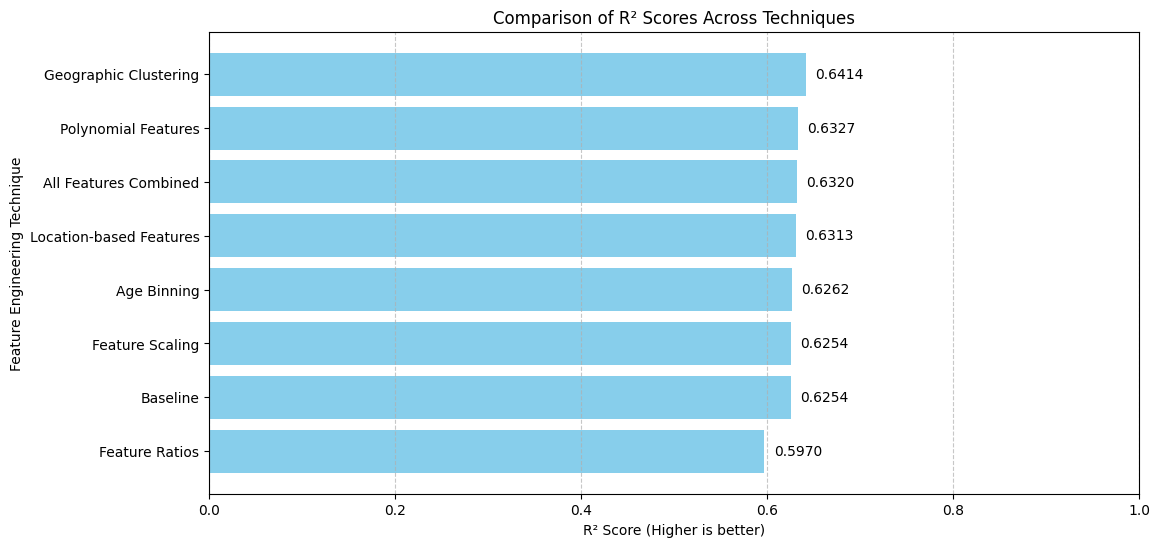

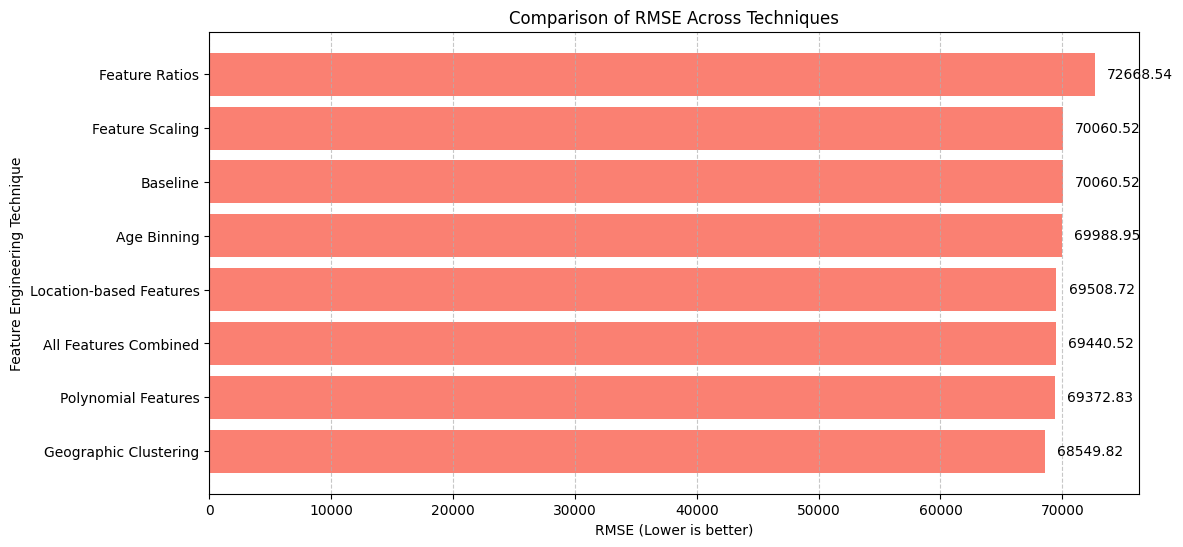

In [ ]:
print("\n===== Comparison of All Models =====")

# Extract test metrics for comparison
comparison = pd.DataFrame({
    'Technique': list(all_metrics.keys()),
    'Test MSE': [m['mse_test'] for m in all_metrics.values()],
    'Test RMSE': [m['rmse_test'] for m in all_metrics.values()],
    'Test R²': [m['r2_test'] for m in all_metrics.values()],
    'Improvement in R²': [m['r2_test'] - baseline_metrics['r2_test'] for m in all_metrics.values()],
    'Improvement in RMSE': [baseline_metrics['rmse_test'] - m['rmse_test'] for m in all_metrics.values()]
})

# Sort by R² score
comparison = comparison.sort_values('Test R²', ascending=False)
print(comparison)

# Plot R² scores
plt.figure(figsize=(12, 6))
comparison_sorted = comparison.sort_values('Test R²')
plt.barh(comparison_sorted['Technique'], comparison_sorted['Test R²'], color='skyblue')
plt.xlabel('R² Score (Higher is better)')
plt.ylabel('Feature Engineering Technique')
plt.title('Comparison of R² Scores Across Techniques')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, v in enumerate(comparison_sorted['Test R²']):
    plt.text(v + 0.01, i, f"{v:.4f}", va='center')

# Plot RMSE values
plt.figure(figsize=(12, 6))
comparison_sorted = comparison.sort_values('Test RMSE')
plt.barh(comparison_sorted['Technique'], comparison_sorted['Test RMSE'], color='salmon')
plt.xlabel('RMSE (Lower is better)')
plt.ylabel('Feature Engineering Technique')
plt.title('Comparison of RMSE Across Techniques')
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, v in enumerate(comparison_sorted['Test RMSE']):
    plt.text(v + 1000, i, f"{v:.2f}", va='center')

print("\nAnalysis complete! Check the comparison table above to see how each technique affects the model performance.")

#XGBoost ML Model For Price Prediciton
We have implemented three models for california housing price prediciton
  - Linear Regression
  - Defualt XGBoost (following two sets of code defines this model on two datasets)
  - Tuned XGBoost (following code defines this model on two version of datasets.)

If we comapre the performance of this three different models
 - Linear Regression = R2 Value -> ~0.62
 - Default XGBoost = R2 Value -> ~0.85
 - Tuned XGBoost = R2 Value -> ~0.90

Followinng are the point why XGBoost Model is better choice for predicting housing prices.
  1. Capturing Non-linear relationships
        - Housing prices have non-linear relationships with features like income and location.
  2. Automatic Feature Interaction
        - XGBoost can learn that proximity of San Francisco has different effect on prices for high-income vs. low-income areas.
  3. Handling COmplex Geopgraphic Patterns
        - Housing markets vary dramatically across california's diverse regions.

Conclusion :-

    XGBoost outperforms linear regression for california housing prices prediction ude to its ability to automatically capture complex patterns, interactions and non-linear realtionships that are prevalent in real estate data.

##Dateset 1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading the California Houses dataset...
Dataset Shape: (20640, 14)

Data Overview:
   Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0            452600.0         8.3252          41        880           129   
1            358500.0         8.3014          21       7099          1106   
2            352100.0         7.2574          52       1467           190   
3            341300.0         5.6431          52       1274           235   
4            342200.0         3.8462          52       1627           280   

   Population  Households  Latitude  Longitude  Distance_to_coast  \
0         322         126     37.88    -122.23        9263.040773   
1        2401        1138     37.86    -122.22       10225.733072   
2         496         177     37.85    -122.24        8259.085109   
3         558         219     37.85    -122.25  

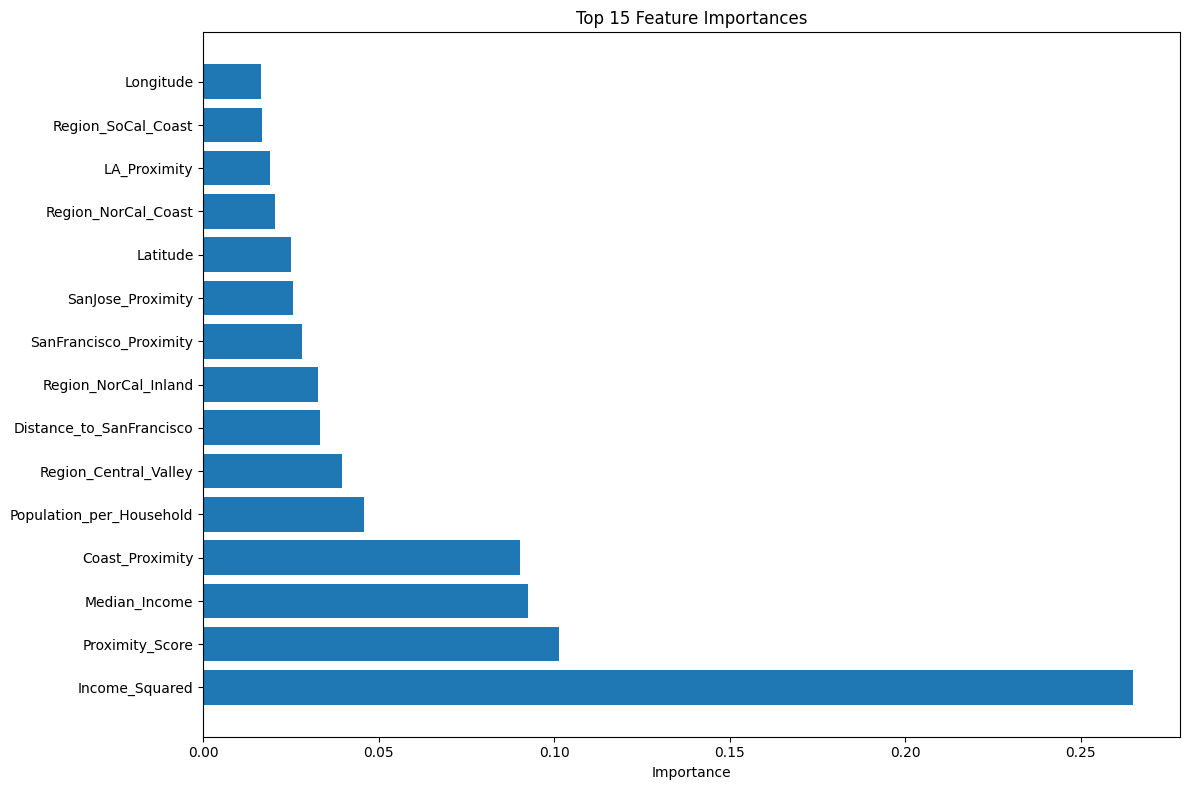

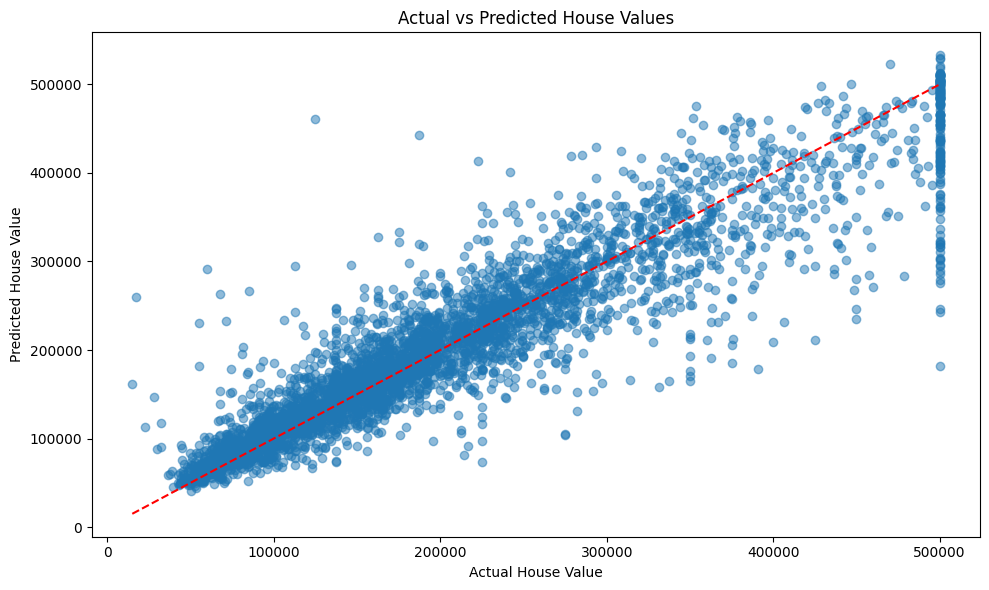

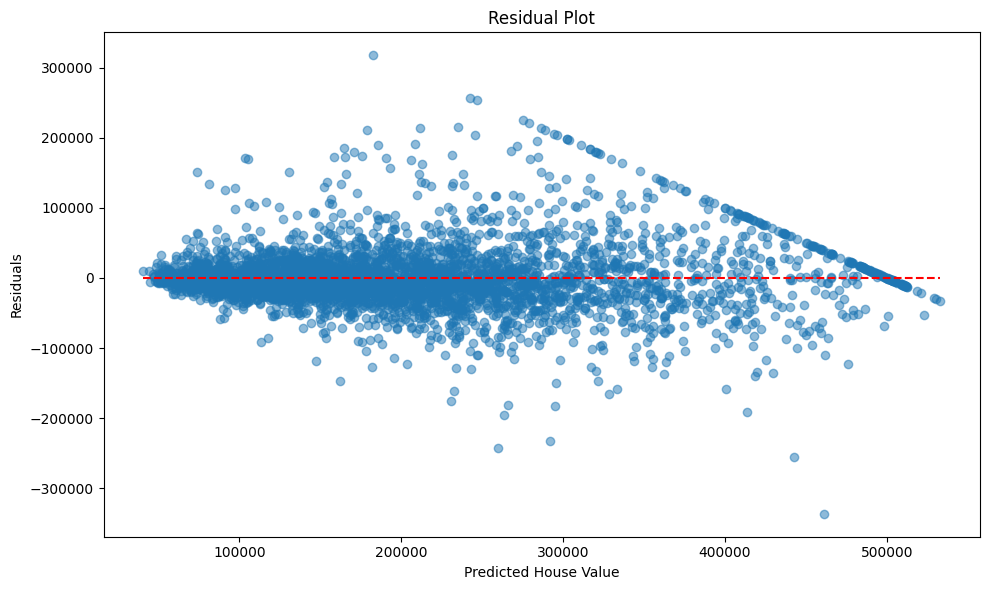

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

# Load the California housing dataset
print("Loading the California Houses dataset...")
data = pd.read_csv('/content/drive/My Drive/California_Houses.csv')
print(f"Dataset Shape: {data.shape}")

# Display information about the dataset
print("\nData Overview:")
print(data.head())

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Feature engineering
print("\nPerforming feature engineering...")

# 1. Create ratio features
data['Rooms_per_Household'] = data['Tot_Rooms'] / data['Households'].replace(0, 1)
data['Bedrooms_per_Room'] = data['Tot_Bedrooms'] / data['Tot_Rooms'].replace(0, 1)
data['Population_per_Household'] = data['Population'] / data['Households'].replace(0, 1)

# 2. Already have distance features in this dataset
# Convert distances to proximity scores (inverse distance)
data['Coast_Proximity'] = 1 / (1 + data['Distance_to_coast'])
data['LA_Proximity'] = 1 / (1 + data['Distance_to_LA'])
data['SanDiego_Proximity'] = 1 / (1 + data['Distance_to_SanDiego'])
data['SanJose_Proximity'] = 1 / (1 + data['Distance_to_SanJose'])
data['SanFrancisco_Proximity'] = 1 / (1 + data['Distance_to_SanFrancisco'])

# Combined proximity score
data['Proximity_Score'] = (
    data['Coast_Proximity'] +
    data['LA_Proximity'] +
    data['SanJose_Proximity'] +
    data['SanFrancisco_Proximity'] +
    data['SanDiego_Proximity']
)

# 3. Income polynomial features
data['Income_Squared'] = data['Median_Income'] ** 2
data['Income_Cubed'] = data['Median_Income'] ** 3

# 4. California region based on coordinates
def california_region(lat, lon):
    if lat > 37.5:
        if lon < -122:
            return 'NorCal_Coast'
        else:
            return 'NorCal_Inland'
    elif lat > 35:
        if lon < -120:
            return 'Central_Coast'
        else:
            return 'Central_Valley'
    else:
        if lon < -118:
            return 'SoCal_Coast'
        else:
            return 'SoCal_Inland'

data['Region'] = data.apply(lambda x: california_region(x['Latitude'], x['Longitude']), axis=1)

# 5. Age categories
def age_category(age):
    if age < 10:
        return 'New'
    elif age < 20:
        return 'Recent'
    elif age < 30:
        return 'Medium'
    elif age < 40:
        return 'Older'
    else:
        return 'Oldest'

data['Age_Category'] = data['Median_Age'].apply(age_category)

# One-hot encode categorical features
data = pd.get_dummies(data, columns=['Region', 'Age_Category'], drop_first=True)

# Split features and target
y = data['Median_House_Value']
X = data.drop('Median_House_Value', axis=1)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

# Standardize numerical features
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("\nTraining XGBoost Model with default parameters...")
# Train a simple XGBoost model first
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

# Calculate metrics
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

# Print metrics
print("\nDefault XGBoost Model Performance:")
print("\nTraining Metrics:")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R² Score: {r2_train:.4f}")

print("\nTesting Metrics:")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R² Score: {r2_test:.4f}")

# Hyperparameter tuning with Grid Search
print("\nPerforming hyperparameter tuning...")
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.05],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=xgb.XGBRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='r2',
    verbose=1
)

grid_search.fit(X_train, y_train)

# Get the best model
best_xgb_model = grid_search.best_estimator_
print(f"\nBest parameters: {grid_search.best_params_}")

# Make predictions with the best model
y_pred_train_best = best_xgb_model.predict(X_train)
y_pred_test_best = best_xgb_model.predict(X_test)

# Calculate metrics
mse_train_best = mean_squared_error(y_train, y_pred_train_best)
rmse_train_best = np.sqrt(mse_train_best)
r2_train_best = r2_score(y_train, y_pred_train_best)

mse_test_best = mean_squared_error(y_test, y_pred_test_best)
rmse_test_best = np.sqrt(mse_test_best)
r2_test_best = r2_score(y_test, y_pred_test_best)

# Print metrics for the best model
print("\nTuned XGBoost Model Performance:")
print("\nTraining Metrics:")
print(f"MSE: {mse_train_best:.2f}")
print(f"RMSE: {rmse_train_best:.2f}")
print(f"R² Score: {r2_train_best:.4f}")

print("\nTesting Metrics:")
print(f"MSE: {mse_test_best:.2f}")
print(f"RMSE: {rmse_test_best:.2f}")
print(f"R² Score: {r2_test_best:.4f}")

# Calculate feature importances
print("\nCalculating feature importances...")

# Get feature importance
importances = best_xgb_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("\nFeature ranking:")
for f in range(min(20, len(feature_names))):  # Print top 20 features
    print(f"{f + 1}. {feature_names[indices[f]]} ({importances[indices[f]]:.4f})")

# Plot feature importances
plt.figure(figsize=(12, 8))
top_features = 15  # Show top 15 features
top_indices = indices[:top_features]
plt.title('Top 15 Feature Importances')
plt.barh(range(top_features), importances[top_indices], align='center')
plt.yticks(range(top_features), [feature_names[i] for i in top_indices])
plt.xlabel('Importance')
plt.tight_layout()

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual House Value')
plt.ylabel('Predicted House Value')
plt.title('Actual vs Predicted House Values')
plt.tight_layout()

# Plot residuals
residuals = y_test - y_pred_test_best
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test_best, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred_test_best.min(), xmax=y_pred_test_best.max(), color='r', linestyle='--')
plt.xlabel('Predicted House Value')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()

# Compare Linear Regression vs XGBoost
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Default XGBoost', 'Tuned XGBoost'],
    'Test R²': [0.622, r2_test, r2_test_best],
    'Test RMSE': [None, rmse_test, rmse_test_best]
})

print("\nModel Comparison:")
print(comparison)

# Feature importance analysis
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False).reset_index(drop=True)

print("\nDetailed Feature Importance:")
print(importance_df.head(20))

print("\nXGBoost model training and evaluation complete!")

##Dateset 2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading the California housing dataset...
Dataset Shape: (20640, 10)

Missing Values:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

Performing feature engineering...
Training set: (16512, 18), Test set: (4128, 18)

Training XGBoost Model with default parameters...

Default XGBoost Model Performance:

Training Metrics:
MSE: 694303936.00
RMSE: 26349.65
R² Score: 0.9481

Testing Metrics:
MSE: 2267184896.00
RMSE: 47614.97
R² Score: 0.8270

Performing hyperparameter tuning...
Fitting 3 folds for each of 48 candidates, totalling 144 fits

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 's

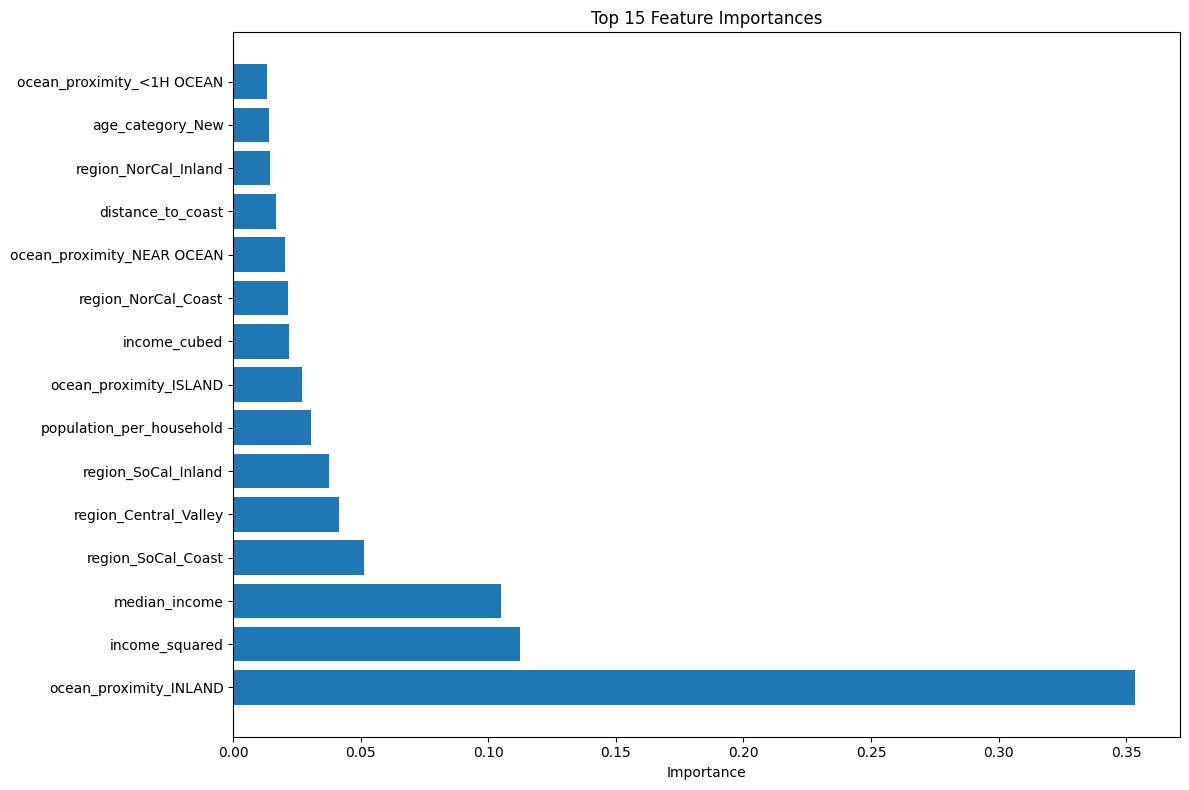

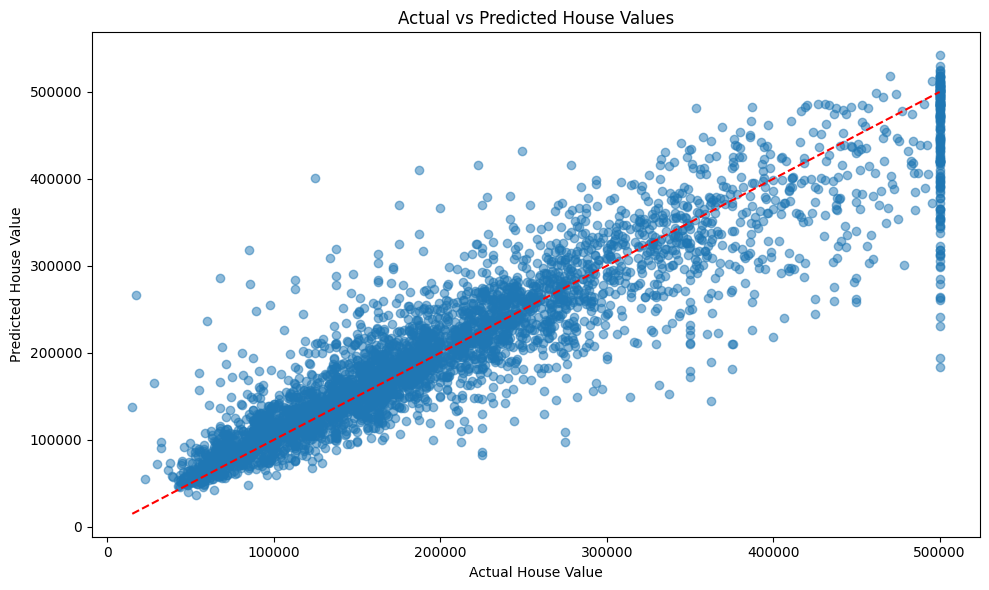

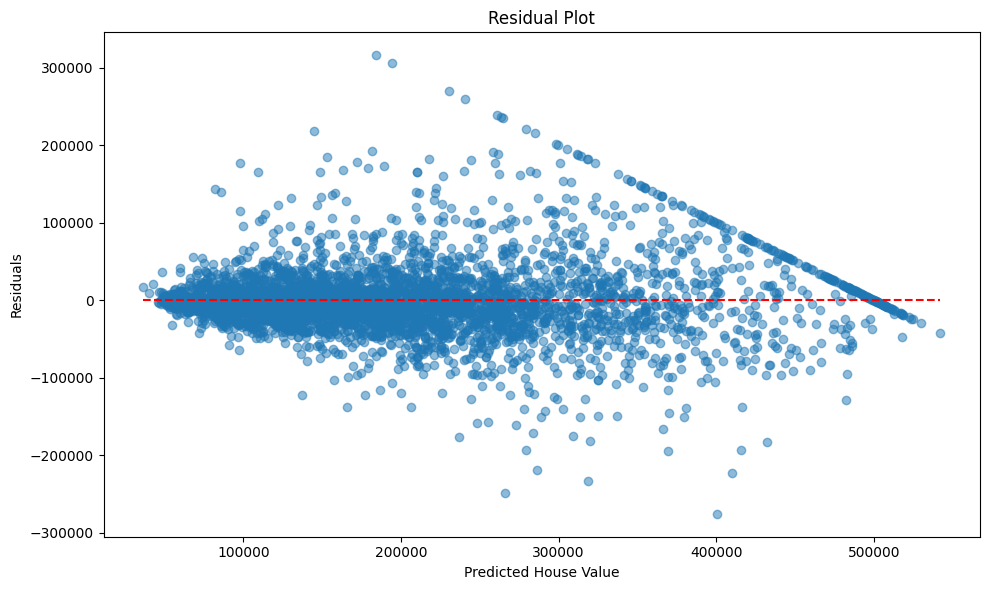

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

# Load the California housing dataset
print("Loading the California housing dataset...")
data = pd.read_csv('/content/drive/My Drive/1553768847-housing.csv')
print(f"Dataset Shape: {data.shape}")

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Handle missing values in total_bedrooms
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)

# Feature engineering
print("\nPerforming feature engineering...")

# 1. Create ratio features
data['rooms_per_household'] = data['total_rooms'] / data['households'].replace(0, 1)
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms'].replace(0, 1)
data['population_per_household'] = data['population'] / data['households'].replace(0, 1)

# 2. Calculate distance to coast (a simplified approximation)
def distance_to_coast(lon, lat):
    # Approximate California coastal line
    if lat < 34.5:  # Southern California
        coast_lon = -118.5
    elif lat < 38:  # Central California
        coast_lon = -122
    else:  # Northern California
        coast_lon = -123

    # Simple Euclidean distance
    return np.sqrt((lon - coast_lon)**2 + (lat - 0)**2)

data['distance_to_coast'] = data.apply(lambda row: distance_to_coast(row['longitude'], row['latitude']), axis=1)
data['coastal_proximity'] = 1 / (1 + data['distance_to_coast'])

# 3. Income polynomial features
data['income_squared'] = data['median_income'] ** 2
data['income_cubed'] = data['median_income'] ** 3

# 4. California region
def california_region(lat, lon):
    if lat > 37.5:
        if lon < -122:
            return 'NorCal_Coast'
        else:
            return 'NorCal_Inland'
    elif lat > 35:
        if lon < -120:
            return 'Central_Coast'
        else:
            return 'Central_Valley'
    else:
        if lon < -118:
            return 'SoCal_Coast'
        else:
            return 'SoCal_Inland'

data['region'] = data.apply(lambda x: california_region(x['latitude'], x['longitude']), axis=1)

# 5. Age categories
def age_category(age):
    if age < 10:
        return 'New'
    elif age < 20:
        return 'Recent'
    elif age < 30:
        return 'Medium'
    elif age < 40:
        return 'Older'
    else:
        return 'Oldest'

data['age_category'] = data['housing_median_age'].apply(age_category)

# Split features and target
y = data['median_house_value']
X = data.drop('median_house_value', axis=1)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

# Identify categorical and numerical columns
categorical_cols = ['ocean_proximity', 'region', 'age_category']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

print("\nTraining XGBoost Model with default parameters...")
# Train a simple XGBoost model first
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train_preprocessed, y_train)

# Make predictions
y_pred_train = xgb_model.predict(X_train_preprocessed)
y_pred_test = xgb_model.predict(X_test_preprocessed)

# Calculate metrics
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

# Print metrics
print("\nDefault XGBoost Model Performance:")
print("\nTraining Metrics:")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R² Score: {r2_train:.4f}")

print("\nTesting Metrics:")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R² Score: {r2_test:.4f}")

# Hyperparameter tuning with Grid Search
print("\nPerforming hyperparameter tuning...")
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.05],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=xgb.XGBRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='r2',
    verbose=1
)

grid_search.fit(X_train_preprocessed, y_train)

# Get the best model
best_xgb_model = grid_search.best_estimator_
print(f"\nBest parameters: {grid_search.best_params_}")

# Make predictions with the best model
y_pred_train_best = best_xgb_model.predict(X_train_preprocessed)
y_pred_test_best = best_xgb_model.predict(X_test_preprocessed)

# Calculate metrics
mse_train_best = mean_squared_error(y_train, y_pred_train_best)
rmse_train_best = np.sqrt(mse_train_best)
r2_train_best = r2_score(y_train, y_pred_train_best)

mse_test_best = mean_squared_error(y_test, y_pred_test_best)
rmse_test_best = np.sqrt(mse_test_best)
r2_test_best = r2_score(y_test, y_pred_test_best)

# Print metrics for the best model
print("\nTuned XGBoost Model Performance:")
print("\nTraining Metrics:")
print(f"MSE: {mse_train_best:.2f}")
print(f"RMSE: {rmse_train_best:.2f}")
print(f"R² Score: {r2_train_best:.4f}")

print("\nTesting Metrics:")
print(f"MSE: {mse_test_best:.2f}")
print(f"RMSE: {rmse_test_best:.2f}")
print(f"R² Score: {r2_test_best:.4f}")

# Calculate feature importances
print("\nCalculating feature importances...")
# Get feature names after preprocessing
feature_names = (
    numerical_cols +
    list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols))
)

# Get feature importance
importances = best_xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("\nFeature ranking:")
for f in range(min(20, len(feature_names))):  # Print top 20 features
    if f < len(indices):
        try:
            print(f"{f + 1}. {feature_names[indices[f]]} ({importances[indices[f]]:.4f})")
        except IndexError:
            print(f"Note: Could not print feature at index {indices[f]} as it's out of range")

# Plot feature importances
plt.figure(figsize=(12, 8))
top_features = 15  # Show top 15 features
top_indices = indices[:top_features]
plt.title('Top 15 Feature Importances')
plt.barh(range(top_features), importances[top_indices], align='center')
plt.yticks(range(top_features), [feature_names[i] for i in top_indices])
plt.xlabel('Importance')
plt.tight_layout()

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual House Value')
plt.ylabel('Predicted House Value')
plt.title('Actual vs Predicted House Values')
plt.tight_layout()

# Plot residuals
residuals = y_test - y_pred_test_best
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test_best, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred_test_best.min(), xmax=y_pred_test_best.max(), color='r', linestyle='--')
plt.xlabel('Predicted House Value')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()

# Compare Linear Regression vs XGBoost
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Default XGBoost', 'Tuned XGBoost'],
    'Test R²': [0.622, r2_test, r2_test_best],
    'Test RMSE': [None, rmse_test, rmse_test_best]
})

print("\nModel Comparison:")
print(comparison)

print("\nXGBoost model training and evaluation complete!")